Optimizers

In [ ]:
import torch
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 5
LR = 0.02
EPOCH = 12

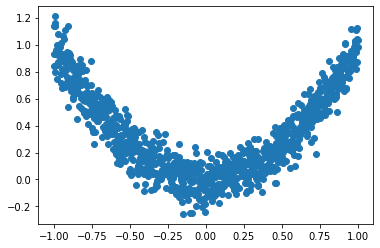

In [ ]:
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y = x.pow(2) + 0.1 *(torch.normal(torch.zeros(*x.size())))
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [ ]:
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,10)
        self.predict = torch.nn.Linear(10,1)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [ ]:
net = Net()

opt_SDG = torch.optim.SGD(net.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net.parameters(), lr=LR, momentum=0.8)
opt_RMSProps = torch.optim.RMSprop(net.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net.parameters(), lr=LR, betas=(0.9,0.99))

loss_func = torch.nn.MSELoss()

nets = [net for _ in range(4)]
optimizers = [opt_SDG, opt_Momentum, opt_RMSProps, opt_Adam]
losses = [[], [], [], []]

In [ ]:
for i in range(EPOCH):
    for step, [x_data, y_data] in enumerate(loader):
        for net_, opt_, loss_ in zip(nets, optimizers, losses):
            output = net_(x_data)
            loss = loss_func(output, y_data)
            opt_.zero_grad()
            loss.backward()
            opt_.step()
            loss_.append(loss.data.numpy())

In [ ]:
len(losses)

4

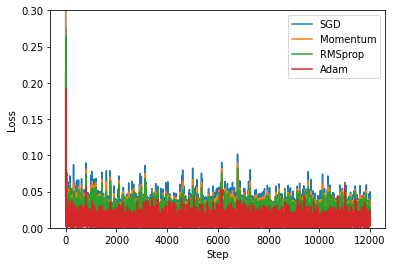

In [ ]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l in enumerate(losses):
    plt.plot(l, label=labels[i])
plt.legend(loc="best")
plt.xlabel('Step')
plt.ylabel('Loss')
plt.ylim((0, 0.3))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=95fccd86-d9c7-402f-a93f-d5e23e9bc087' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>